In [1]:
from tot import TreeOfThoughts
from llm_engine import Engine, LlmApiClient
from dotenv import load_dotenv
import os
from openai import AsyncOpenAI
from tot_config import Configuration

mode = "vllm"

if mode == "openai":
    # OpenAI client
    load_dotenv(".env")

    OPENAI_API_KEY = os.environ.get("OPENAI_API_KEY")

    client_openai = LlmApiClient(api_key=OPENAI_API_KEY, model="gpt-4o-mini")

    engine = Engine(client_openai, chat=True, model="gpt-4o-mini")

elif mode == "vllm":
    NGROK_LINK = "https://" + "fitting-shrimp-pleasantly.ngrok-free.app"

    client_vllm = LlmApiClient(
        api_key="None",
        base_url=str(NGROK_LINK + "/v1"),
        model="Qwen/Qwen3-14B",
    )

    model = "Qwen/Qwen2.5-32B-Instruct-GPTQ-Int8"
    model = "Qwen/Qwen3-14B"
    engine = Engine(client_vllm, chat=True, model=model, thinking=False, remove_thinking=True, max_parallel_requests=50)

else:
    raise ValueError("Invalid mode. Choose 'openai' or 'vllm'")


In [2]:
test_query = """Which weighs more, a pound of water, two pounds of bricks, a pound of feathers, or three pounds of air?"""

answer = await engine.query(test_query, max_tokens=1000)
print(f"Test query answer: {answer}")

Test query answer: To determine which weighs more among the given items, let's look at the weights directly:

- **A pound of water** = **1 pound**
- **Two pounds of bricks** = **2 pounds**
- **A pound of feathers** = **1 pound**
- **Three pounds of air** = **3 pounds**

### So, comparing the weights:

- A pound of water = 1 lb  
- Two pounds of bricks = 2 lbs  
- A pound of feathers = 1 lb  
- Three pounds of air = 3 lbs  

### The heaviest is: **Three pounds of air**, at **3 pounds**.

### Final Answer:
**Three pounds of air** weighs the most.


In [9]:
from tot_tester import TestRunner
from pddl_translation.translator import NatLangTranslator
# Initialize the prompt translator
prompt_translator = NatLangTranslator()
#os.environ["FAST_DOWNWARD"] = "C:\\Users\\Leon\\Documents\\UniPC\\bachelor_arbeit\\downward"
os.environ["FAST_DOWNWARD"] = "/home/leon/bachelor_arbeit/fast-downward-24.06/"
#os.environ["VAL"] = "C:\\Users\\Leon\\Documents\\UniPC\\bachelor_arbeit\\VAL"
os.environ["VAL"] = "/home/leon/bachelor_arbeit/VAL/validate"
context = "I am playing with a set of blocks where I need to arrange the blocks into stacks. Here are the actions I can do\n\nPick up a block\nUnstack a block from on top of another block\nPut down a block\nStack a block on top of another block\n\nI have the following restrictions on my actions:\nI can only pick up or unstack one block at a time.\nI can only pick up or unstack a block if my hand is empty.\nI can only pick up a block if the block is on the table and the block is clear. A block is clear if the block has no other blocks on top of it and if the block is not picked up.\nI can only unstack a block from on top of another block if the block I am unstacking was really on top of the other block.\nI can only unstack a block from on top of another block if the block I am unstacking is clear.\nOnce I pick up or unstack a block, I am holding the block.\nI can only put down a block that I am holding.\nI can only stack a block on top of another block if I am holding the block being stacked.\nI can only stack a block on top of another block if the block onto which I am stacking the block is clear.\nOnce I put down or stack a block, my hand becomes empty.\nOnce you stack a block on top of a second block, the second block is no longer clear."
example = "For example, if I have a blue block on the table and a red block on top of it (and clear), then I may NOT pick up the red block because it is on top of another block. This means I must instead unstack it."
context += "\n" + example
runner = TestRunner(None, prompt_translator, context=context, hard=True)

In [ ]:
import logging
import sys
logger = logging.getLogger("nov_tot")
logger.setLevel(logging.DEBUG)
logger.addHandler(logging.StreamHandler(sys.stdout))
#logging.basicConfig(level=logging.DEBUG, handlers=[logging.StreamHandler(sys.stdout)], force=True)

In [3]:
config_name = "explicit_state_action_2_thinking"
config=Configuration.from_file(config_name)
parallel = "novelty" not in config_name
print(f"Running TOT with config: {config_name}, parallel: {parallel}")
parallel = True
results, summary = await runner.run(config, num_tasks=5, instances=[9,10,14,15,18], write_tot=True, branch_factor=2, max_depth=8, parallel_tot=parallel, parallel_tasks=True, breadth_first=False)

Running TOT with config: explicit_state_action_2_thinking, parallel: True
Tree of Thoughts initialized with mode: explicit_state_action, max_depth: 8, branch_factor: 2, novelty: False, explicit_state_action: True
Tree of Thoughts initialized with mode: explicit_state_action, max_depth: 8, branch_factor: 2, novelty: False, explicit_state_action: True
Tree of Thoughts initialized with mode: explicit_state_action, max_depth: 8, branch_factor: 2, novelty: False, explicit_state_action: True
Tree of Thoughts initialized with mode: explicit_state_action, max_depth: 8, branch_factor: 2, novelty: False, explicit_state_action: True
Tree of Thoughts initialized with mode: explicit_state_action, max_depth: 8, branch_factor: 2, novelty: False, explicit_state_action: True
Query is too long, replace the middle with ' [...] '.
Query length: 11790
Original Query: Extract the answer for the question -START-
'I am playing with a set of blocks where I need to arrange the blocks into stacks. Here are the a

Unexpected response: 


Query is too long, replace the middle with ' [...] '.
Query length: 7893
Original Query: Extract the answer for the question -START-
'I am playing with a set of blocks where I need to arrange the blocks into stacks. Here are the actions I can do

Pick up a block
Unstack a block from on top of another block
Put down a block
Stack a block on top of another block

I have the following restrictions on my actions:
I can only pick up or unstack one block at a time.
I can only pick up or unstack a block if my hand is empty.
I can only pick up a block if the block is on the table and the block is clear. A block is clear if the block has no other blocks on top of it and if the block is not picked up.
I can only unstack a block from on top of another block if the block I am unstacking was really on top of the other block.
I can only unstack a block from on top of another block if the block I am unstacking is clear.
Once I pick up or unstack a block, I am holding the block.
I can only put down a 

Unexpected response: 


Query is too long, replace the middle with ' [...] '.
Query length: 11790
Original Query: Extract the answer for the question -START-
'I am playing with a set of blocks where I need to arrange the blocks into stacks. Here are the actions I can do

Pick up a block
Unstack a block from on top of another block
Put down a block
Stack a block on top of another block

I have the following restrictions on my actions:
I can only pick up or unstack one block at a time.
I can only pick up or unstack a block if my hand is empty.
I can only pick up a block if the block is on the table and the block is clear. A block is clear if the block has no other blocks on top of it and if the block is not picked up.
I can only unstack a block from on top of another block if the block I am unstacking was really on top of the other block.
I can only unstack a block from on top of another block if the block I am unstacking is clear.
Once I pick up or unstack a block, I am holding the block.
I can only put down a

Unexpected response: 
Unexpected response: 
Unexpected response: 
Unexpected response: 


In [4]:
print("Results:")
for result in results:
    print(result)
print("Summary:")
print(summary)

Results:
task_id='instance-18.pddl' success=True answer='Unstack red from yellow  \nPut down red on table  \nUnstack yellow from blue  \nStack yellow on red  \nPick up blue  \nStack blue on yellow' token_usage=1424108
task_id='instance-19.pddl' success=False answer='No answer found.' token_usage=1250502
task_id='instance-22.pddl' success=False answer='No answer found.' token_usage=1335107
task_id='instance-23.pddl' success=False answer='No answer found.' token_usage=1038124
task_id='instance-26.pddl' success=False answer='No answer found.' token_usage=865800
Summary:
{'total_tasks': 5, 'successful_tasks': 1, 'failed_tasks': 4, 'total_token_usage': 5913641}


In [ ]:
from tot import TreeOfThoughts
from llm_engine import Engine
from dotenv import load_dotenv
import os
from openai import AsyncOpenAI
from tot_config import Configuration

mode = "vllm"

if mode == "openai":
    # OpenAI client
    load_dotenv(".env")

    OPENAI_API_KEY = os.environ.get("OPENAI_API_KEY")

    client_openai = AsyncOpenAI(api_key=OPENAI_API_KEY)

    engine = Engine(client_openai, chat=True, model="gpt-4o-mini")

elif mode == "vllm":
    NGROK_LINK = "https://" + "fitting-shrimp-pleasantly.ngrok-free.app"

    client_vllm = AsyncOpenAI(
        api_key="None",
        base_url=str(NGROK_LINK + "/v1")
    )

    model = "Qwen/Qwen2.5-32B-Instruct-GPTQ-Int8"
    model = "Qwen/Qwen3-14B"
    engine = Engine(client_vllm, chat=True, model=model, thinking=False, remove_thinking=True, max_parallel_requests=50)

else:
    raise ValueError("Invalid mode. Choose 'openai' or 'vllm'")

In [6]:
config_name = "base_reasoning"
config=Configuration.from_file(config_name)
parallel = "novelty" not in config_name
print(f"Running TOT with config: {config_name}, parallel: {parallel}")
parallel = True
results_2, summary_2 = await runner.run(config, num_tasks=5, write_tot=True, branch_factor=2, max_depth=8, parallel_tot=parallel, parallel_tasks=True, breadth_first=False)

Running TOT with config: base_reasoning, parallel: True
Tree of Thoughts initialized with mode: base, max_depth: 8, branch_factor: 2, novelty: False, explicit_state_action: False
Tree of Thoughts initialized with mode: base, max_depth: 8, branch_factor: 2, novelty: False, explicit_state_action: False
Tree of Thoughts initialized with mode: base, max_depth: 8, branch_factor: 2, novelty: False, explicit_state_action: False
Tree of Thoughts initialized with mode: base, max_depth: 8, branch_factor: 2, novelty: False, explicit_state_action: False
Tree of Thoughts initialized with mode: base, max_depth: 8, branch_factor: 2, novelty: False, explicit_state_action: False
Running validation command: /home/leon/bachelor_arbeit/VAL/validate test_data/PDDL/Blocksworld/domain.pddl test_data/PDDL/Blocksworld/instances/instance-10.pddl plan_51b09e3c5e168b78.pddl
Validator stdout:





















































Checking plan: plan_51b09e3c5e168b78.pddl

Plan failed to execute


Fa

In [7]:
print("Results:")
for result in results_2:
    print(result)
print("Summary:")
print(summary_2)

Results:
task_id='instance-1.pddl' success=True answer='Unstack yellow from orange. Put down yellow on table. Unstack red from blue. Stack red on orange. Pick up blue. Stack blue on yellow. [FINISHED]' token_usage=844277
task_id='instance-10.pddl' success=False answer='Unstack the orange block from the red block.\nPick up the red block.\nStack the red block on top of the blue block.\n[FINISHED]\nThe plan is not valid according to the PDDL validator.' token_usage=75773
task_id='instance-11.pddl' success=False answer='No answer found.' token_usage=256109
task_id='instance-12.pddl' success=False answer='Unstack the orange block from the blue block.\nPut down the orange block on the table.\nUnstack the blue block from the red block.\nPick up the red block.\nStack the red block on top of the orange block.\n[FINISHED]\nThe plan is not valid according to the PDDL validator.' token_usage=496784
task_id='instance-13.pddl' success=False answer='Unstack the orange block from the blue block.  \nPu

In [8]:
config_name = "base_reasoning"
config=Configuration.from_file(config_name)
parallel = "novelty" not in config_name
print(f"Running TOT with config: {config_name}, parallel: {parallel}")
parallel = True
results_3, summary_3 = await runner.run(config, num_tasks=5, instances=[5,6,7,8,9], write_tot=True, branch_factor=2, max_depth=8, parallel_tot=parallel, parallel_tasks=True, breadth_first=False)

Running TOT with config: base_reasoning, parallel: True
Tree of Thoughts initialized with mode: base, max_depth: 8, branch_factor: 2, novelty: False, explicit_state_action: False
Tree of Thoughts initialized with mode: base, max_depth: 8, branch_factor: 2, novelty: False, explicit_state_action: False
Tree of Thoughts initialized with mode: base, max_depth: 8, branch_factor: 2, novelty: False, explicit_state_action: False
Tree of Thoughts initialized with mode: base, max_depth: 8, branch_factor: 2, novelty: False, explicit_state_action: False
Tree of Thoughts initialized with mode: base, max_depth: 8, branch_factor: 2, novelty: False, explicit_state_action: False
Query is too long, replace the middle with ' [...] '.
Query length: 6152
Original Query: Extract the answer for the question -START-
'I am playing with a set of blocks where I need to arrange the blocks into stacks. Here are the actions I can do

Pick up a block
Unstack a block from on top of another block
Put down a block
Stac

Unexpected response: 


Running validation command: /home/leon/bachelor_arbeit/VAL/validate test_data/PDDL/Blocksworld/domain.pddl test_data/PDDL/Blocksworld/instances/instance-16.pddl plan_269dd29227e8afd4.pddl
Validator stdout:




















































Checking plan: plan_269dd29227e8afd4.pddl
Plan executed successfully - checking goal
Plan valid
Final value: 6 

Successful plans:
Value: 6
 plan_269dd29227e8afd4.pddl 6 




In [9]:
print("Results:")
for result in results_3:
    print(result)
print("Summary:")
print(summary_3)

Results:
task_id='instance-14.pddl' success=True answer='Unstack the yellow block from the blue block.  \nPut down the yellow block on the table.  \nUnstack the blue block from the red block.  \nStack the blue block on top of the orange block.  \nPick up the red block.  \nStack the red block on top of the yellow block. [FINISHED]' token_usage=386306
task_id='instance-15.pddl' success=True answer='Unstack the red block from the orange block.  \nPut down the red block on the table.  \nUnstack the orange block from the blue block.  \nStack the orange block on top of the red block.  \nPick up the blue block.  \nStack the blue block on top of the yellow block.  \n[FINISHED]' token_usage=263358
task_id='instance-16.pddl' success=True answer='Unstack the orange block from the yellow block.  \nPut down the orange block on the table.  \nUnstack the yellow block from the blue block.  \nPut down the yellow block on the table.  \nPick up the orange block.  \nStack the orange block on top of the bl

In [11]:
print(engine.thinking)

False


In [10]:
print(engine.total_token_usage)

0


In [12]:
from tot import TreeOfThoughts
# load tot from file as json
with open("test_tot_instance-1.pddl.json", "r") as f:
    string = f.read()
    tot = TreeOfThoughts.deserialize(string, llm_engine=engine)

Tree of Thoughts initialized with mode: explicit_state_action, max_depth: 3, branch_factor: 2, novelty: False, explicit_state_action: True


In [13]:
from tree_gui import get_tree_view
from PySide6.QtWidgets import QApplication
import qdarkstyle

tree = tot.init_state

# Create a tree view using the TreeOfThoughts class
app = QApplication.instance()
if not app:
    app = QApplication([])
app.setStyleSheet(qdarkstyle.load_stylesheet(qt_api='pyside6'))
tree_view = get_tree_view(tree, 80, 150)
tree_view.show()
app.exec()


0

In [ ]:
results_dir = "tot_results/"

import os
import json

config_files = os.listdir(results_dir)

config_dirs = [d for d in config_files if os.path.isdir(os.path.join(results_dir, d))]


#tag = "all50_32kcontext_high_query_length"
tag = "gameN_b2_d4"
tag = tag + "_"

tag_with_novelty = tag + "novelty_"

current_configs = {}
current_configs_novelty = {}
for config_name in config_dirs:
    all_configs = os.listdir(os.path.join(results_dir, config_name))

    # remove all that dont have tag in the name
    config_files = [f for f in all_configs if tag in f and tag_with_novelty not in f]
    novelty_config_files = [f for f in all_configs if tag_with_novelty in f]

    if config_files:
        # get dates from filenames
        dates = [
            filename.split(tag)[1].split(".json")[0] for filename in config_files
        ]

        # filter duplicate configs to only keep the latest date
        latest_date = max(dates)
        current_configs[config_name] = latest_date

    if novelty_config_files:
        novelty_dates = [
            filename.split(tag_with_novelty)[1].split(".json")[0] for filename in novelty_config_files
        ]

        latest_novelty_date = max(novelty_dates)
        current_configs_novelty[config_name] = latest_novelty_date

print("Latest configs:")
for config, date in current_configs.items():
    print(f"{config}: {date}")
    with open(os.path.join(results_dir, f"{config}/{tag}{date}.json"), "r") as f:
        data = json.load(f)
        data["summary"]["avg_tokens"] = data["summary"]["total_token_usage"] / 50
        print(f"Results: {data['summary']}\n")

print("Latest novelty configs:")
for config, date in current_configs_novelty.items():
    print(f"{config}: {date}")
    with open(os.path.join(results_dir, f"{config}/{tag_with_novelty}{date}.json"), "r") as f:
        data = json.load(f)
        data["summary"]["avg_tokens"] = data["summary"]["total_token_usage"] / 50
        print(f"Results: {data['summary']}\n")


Latest configs:
Latest novelty configs:


In [7]:
from tot import TreeOfThoughts
import os

test_tot_dir = "test_tot_math/"

instances_per_config = {}
states_per_config = {}

for config_dir in os.listdir(test_tot_dir):
    for novelty in ["non_novelty", "novelty"]:
        path = os.path.join(test_tot_dir, config_dir, novelty)
        if not os.path.exists(path):
            continue
        instance_paths = [
            os.path.join(path, f)
            for f in os.listdir(path)
            if f.endswith(".json")
        ]
        instances = []
        for instance_path in instance_paths:
            with open(instance_path, "r") as f:
                tot_string = f.read()
                instance = TreeOfThoughts.deserialize(tot_string, llm_engine=None)
                instances.append(instance)
        num_states_per_instance = [len(list(instance.init_state.walk())) for instance in instances]

        # Store data for later plotting
        states_per_config[(config_dir, novelty)] = num_states_per_instance

        # Print statistics
        if num_states_per_instance:
            mean = sum(num_states_per_instance) / len(num_states_per_instance)
            variance = sum((x - mean) ** 2 for x in num_states_per_instance) / len(num_states_per_instance)
        else:
            mean = 0
            variance = 0
        print(f"Config: {config_dir}, Novelty: {novelty}, Instances: {len(instance_paths)}")
        print(f"Average num states: {mean}")
        print(f"Variance num states: {variance}")
        print("")

Config: base_simple, Novelty: non_novelty, Instances: 50
Average num states: 122.84
Variance num states: 214.05439999999984

Config: base_simple, Novelty: novelty, Instances: 50
Average num states: 45.3
Variance num states: 1127.65

Config: explicit_state_action_2_thinking, Novelty: non_novelty, Instances: 50
Average num states: 3.16
Variance num states: 0.6144000000000002

Config: explicit_state_action_2_thinking, Novelty: novelty, Instances: 50
Average num states: 2.62
Variance num states: 0.23559999999999978

Config: explicit_state_action_2_reasoning, Novelty: non_novelty, Instances: 50
Average num states: 10.6
Variance num states: 314.88000000000005

Config: explicit_state_action_2_reasoning, Novelty: novelty, Instances: 50
Average num states: 5.46
Variance num states: 50.80839999999995

Config: base_thinking, Novelty: non_novelty, Instances: 50
Average num states: 3.8
Variance num states: 2.560000000000001

Config: base_thinking, Novelty: novelty, Instances: 50
Average num states:

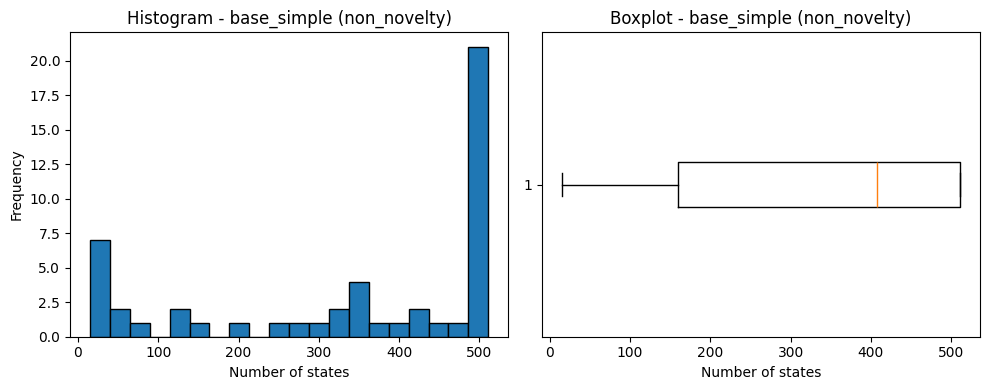

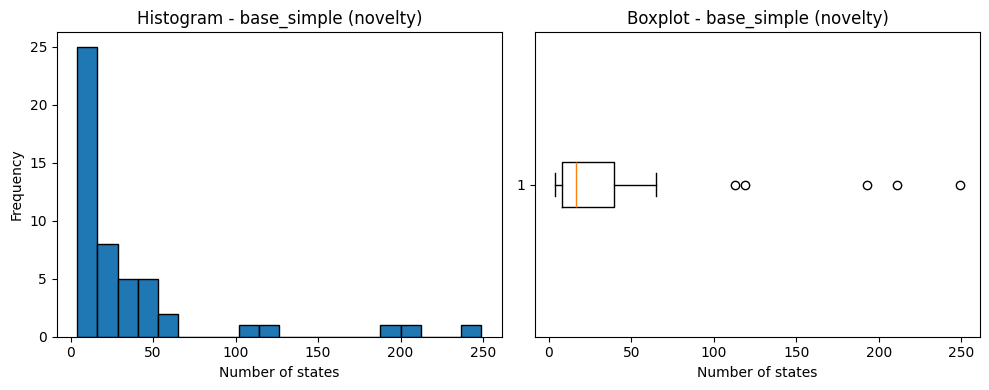

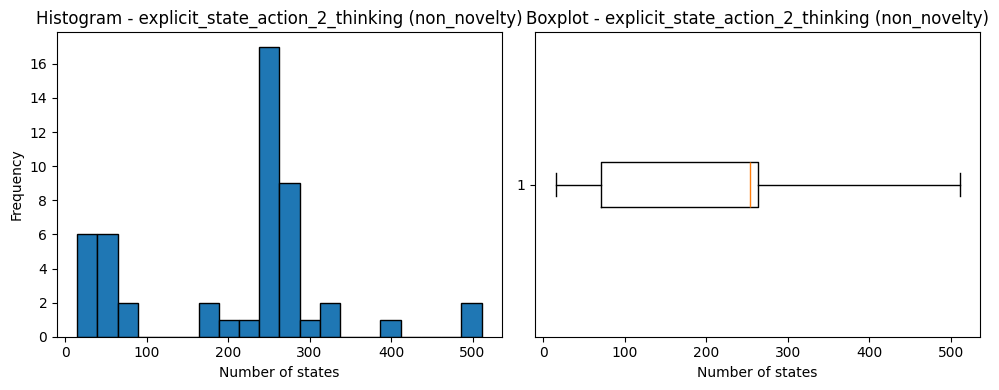

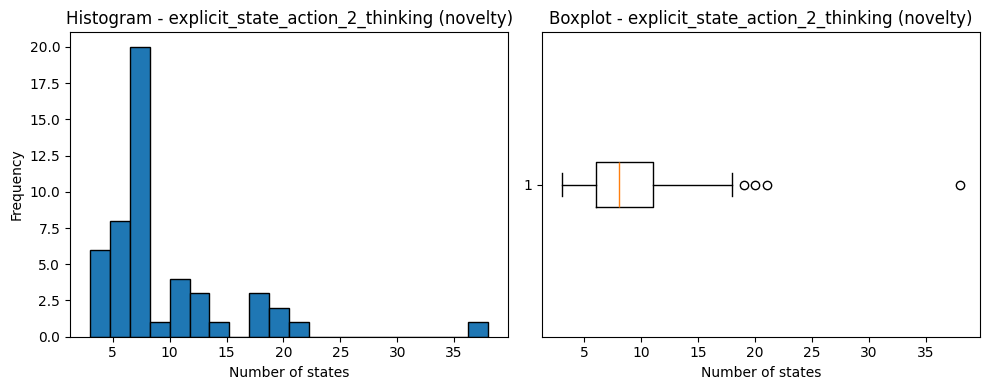

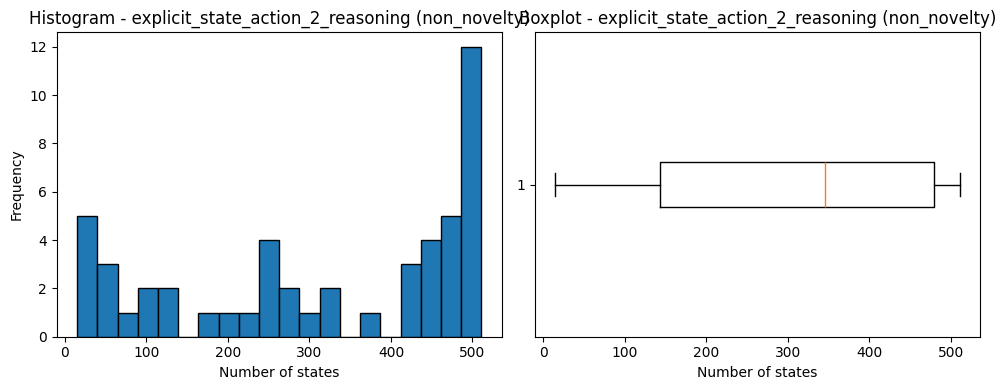

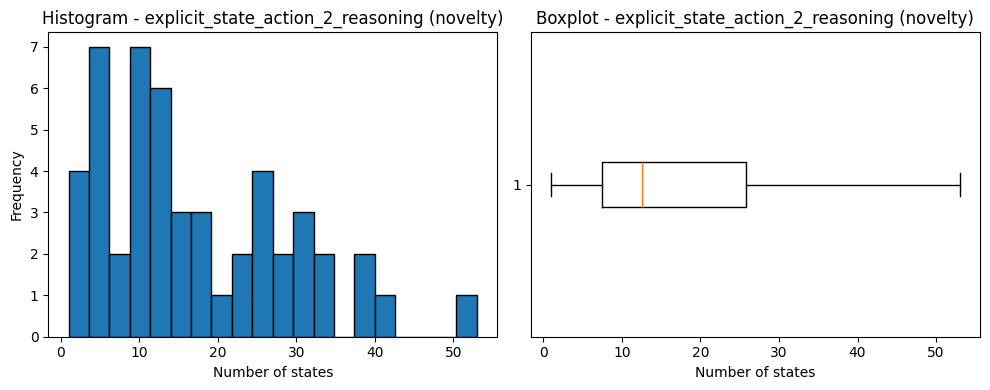

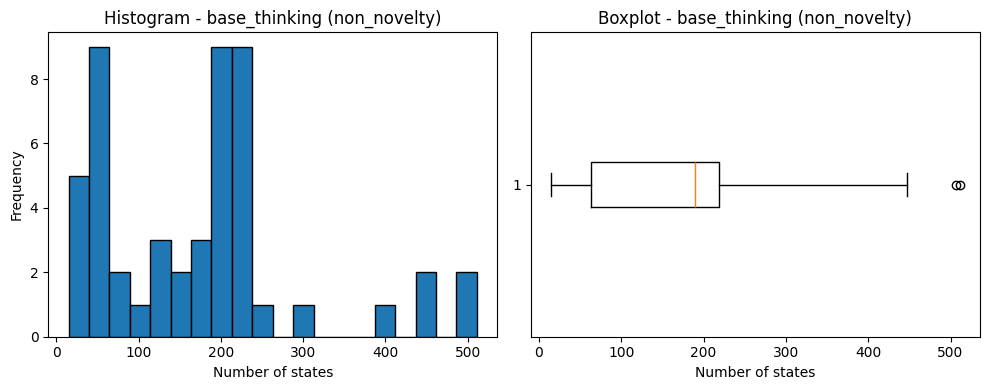

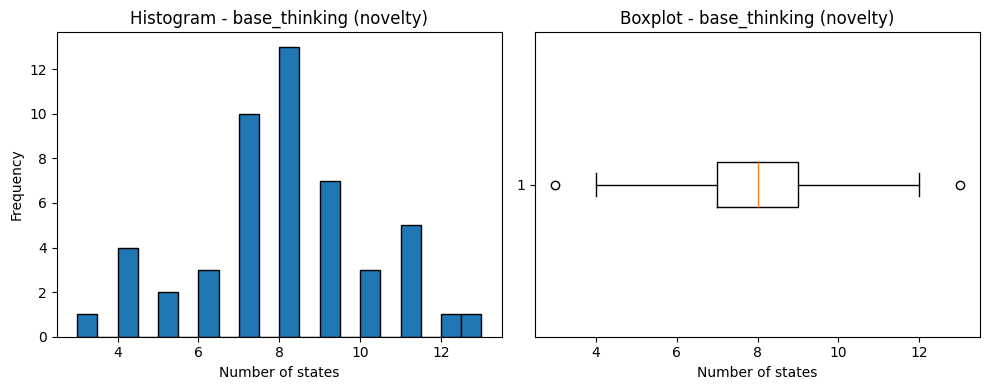

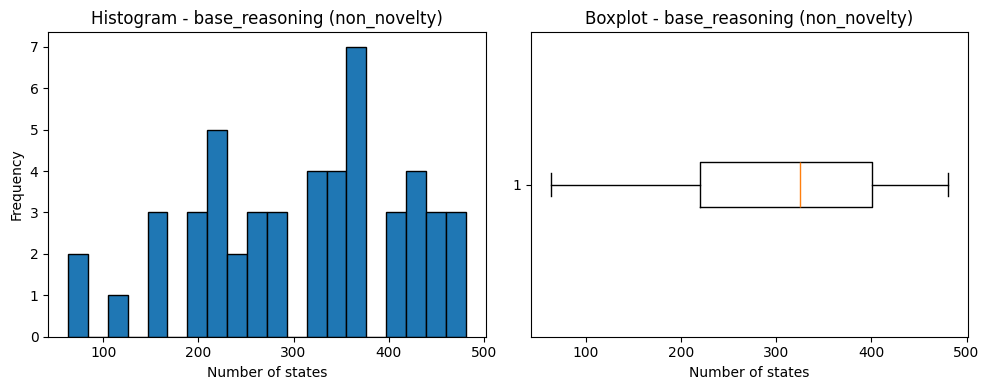

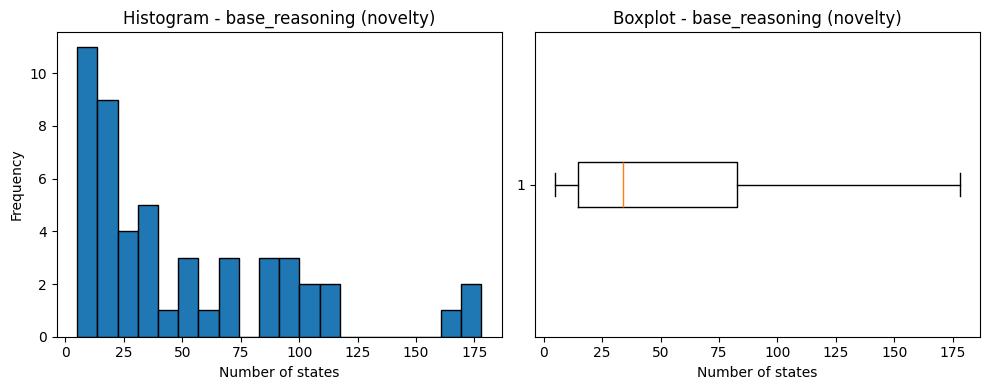

In [7]:
import matplotlib.pyplot as plt

for (config, novelty), values in states_per_config.items():
    plt.figure(figsize=(10,4))

    # Histogram
    plt.subplot(1,2,1)
    plt.hist(values, bins=20, edgecolor='black')
    plt.title(f"Histogram - {config} ({novelty})")
    plt.xlabel("Number of states")
    plt.ylabel("Frequency")

    # Boxplot
    plt.subplot(1,2,2)
    plt.boxplot(values, vert=False)
    plt.title(f"Boxplot - {config} ({novelty})")
    plt.xlabel("Number of states")

    plt.tight_layout()
    plt.show()

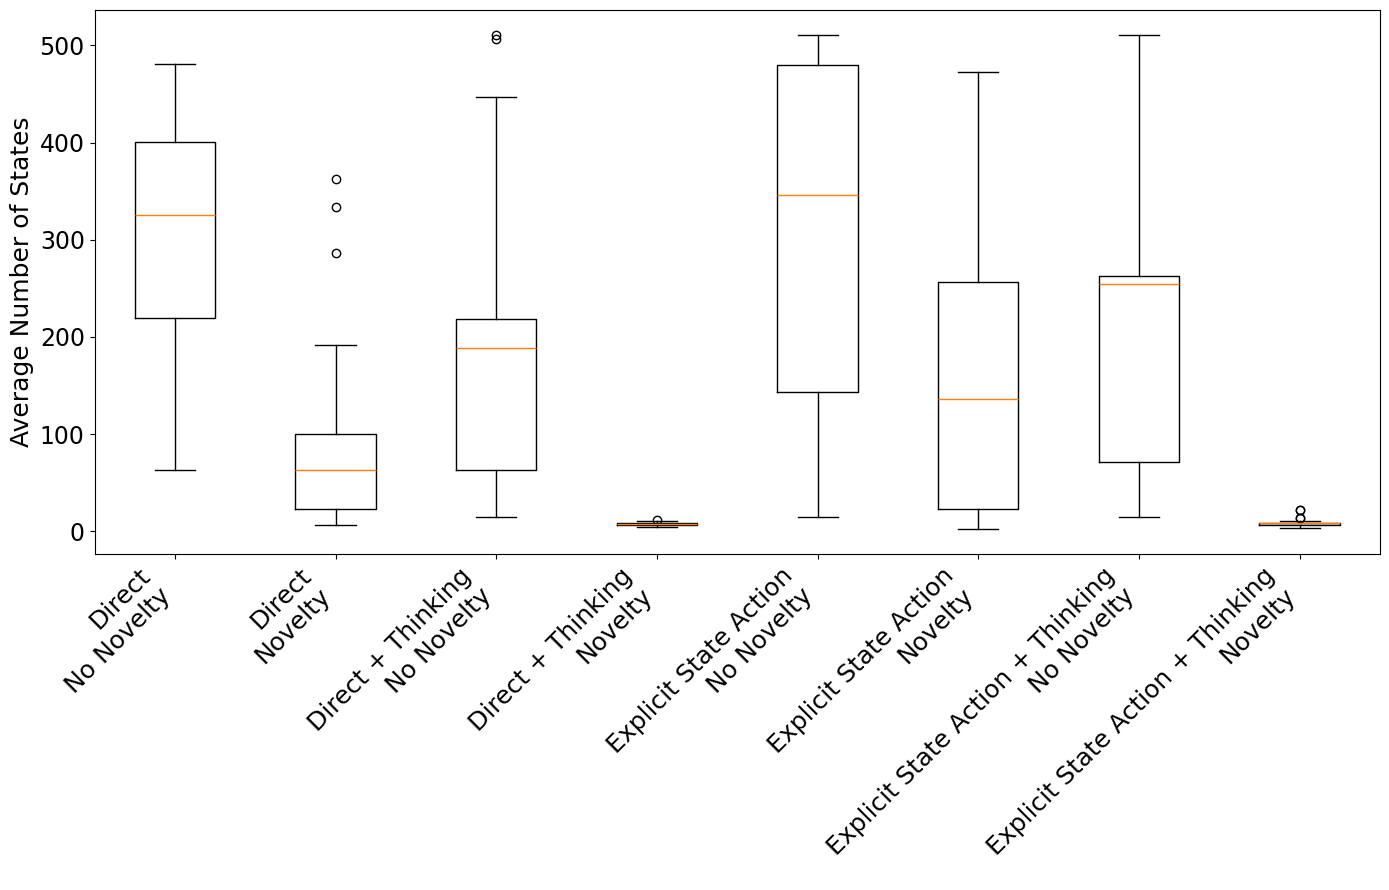

In [68]:
labels = []
data = []

# rename configs
config_rename_map = {
    "base_reasoning": "Direct",
    "base_thinking": "Direct + Thinking",
    "explicit_state_action_2_reasoning": "Explicit State Action",
    "explicit_state_action_2_thinking": "Explicit State Action + Thinking",
}

order = [
    "base_reasoning",
    "base_thinking",
    "explicit_state_action_2_reasoning",
    "explicit_state_action_2_thinking",
]

# rename novelty
novelty_rename_map = {
    "non_novelty": "No Novelty",
    "novelty": "Novelty",
}

for (config, novelty), values in states_per_config.items():
    config = config_rename_map.get(config, None)
    if config is None:
        continue
    novelty = novelty_rename_map.get(novelty, novelty)
    labels.append(f"{config}\n{novelty}")
    data.append(values)

new_order = [6, 7, 4, 5, 2, 3, 0, 1]
labels = [labels[i] for i in new_order]
data = [data[i] for i in new_order]

plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({
    #'font.size': 18,
    #'axes.titlesize': 24,
    'axes.labelsize': 18,
    'xtick.labelsize': 18,
    'ytick.labelsize': 17,
    #'legend.fontsize': 16,
    #'figure.titlesize': 20,
})

plt.figure(figsize=(14,9))
plt.boxplot(data, tick_labels=labels, vert=True, showfliers=True)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Average Number of States")
#plt.title("Distribution of states per instance")
plt.tight_layout()
plt.show()

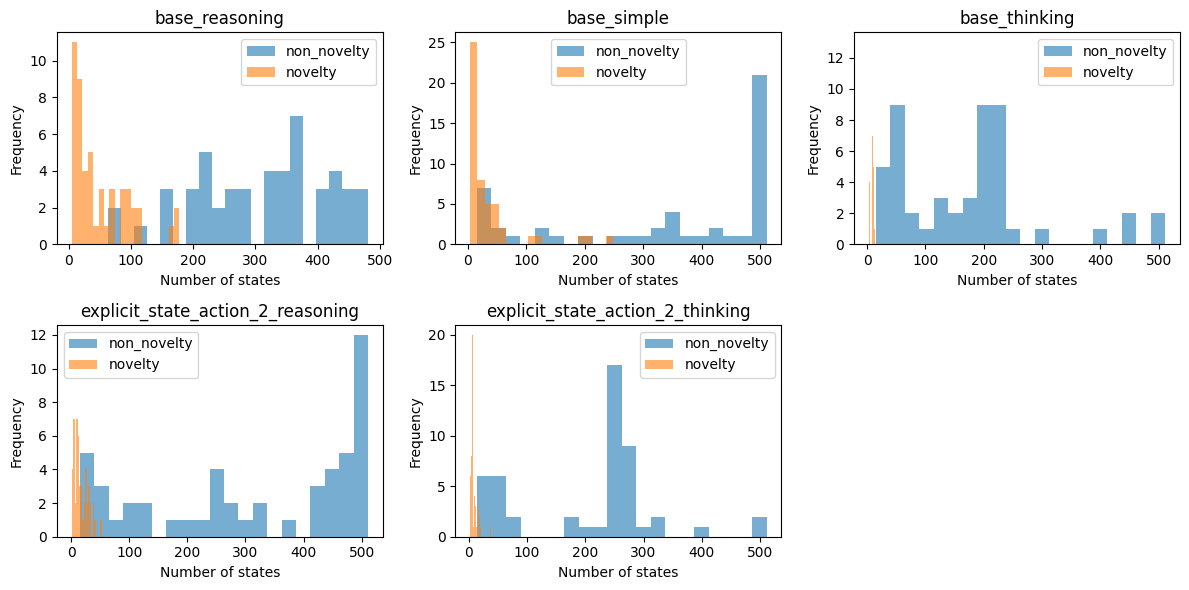

In [8]:
plt.figure(figsize=(12,6))

for i, config in enumerate(sorted(set(c for c, _ in states_per_config.keys()))):
    plt.subplot(2, (len(states_per_config)//2)//2 + 1, i+1)  # auto layout
    values_non = states_per_config[(config, "non_novelty")]
    values_nov = states_per_config[(config, "novelty")]
    
    plt.hist(values_non, bins=20, alpha=0.6, label="non_novelty")
    plt.hist(values_nov, bins=20, alpha=0.6, label="novelty")
    plt.title(config)
    plt.xlabel("Number of states")
    plt.ylabel("Frequency")
    plt.legend()

plt.tight_layout()
plt.show()

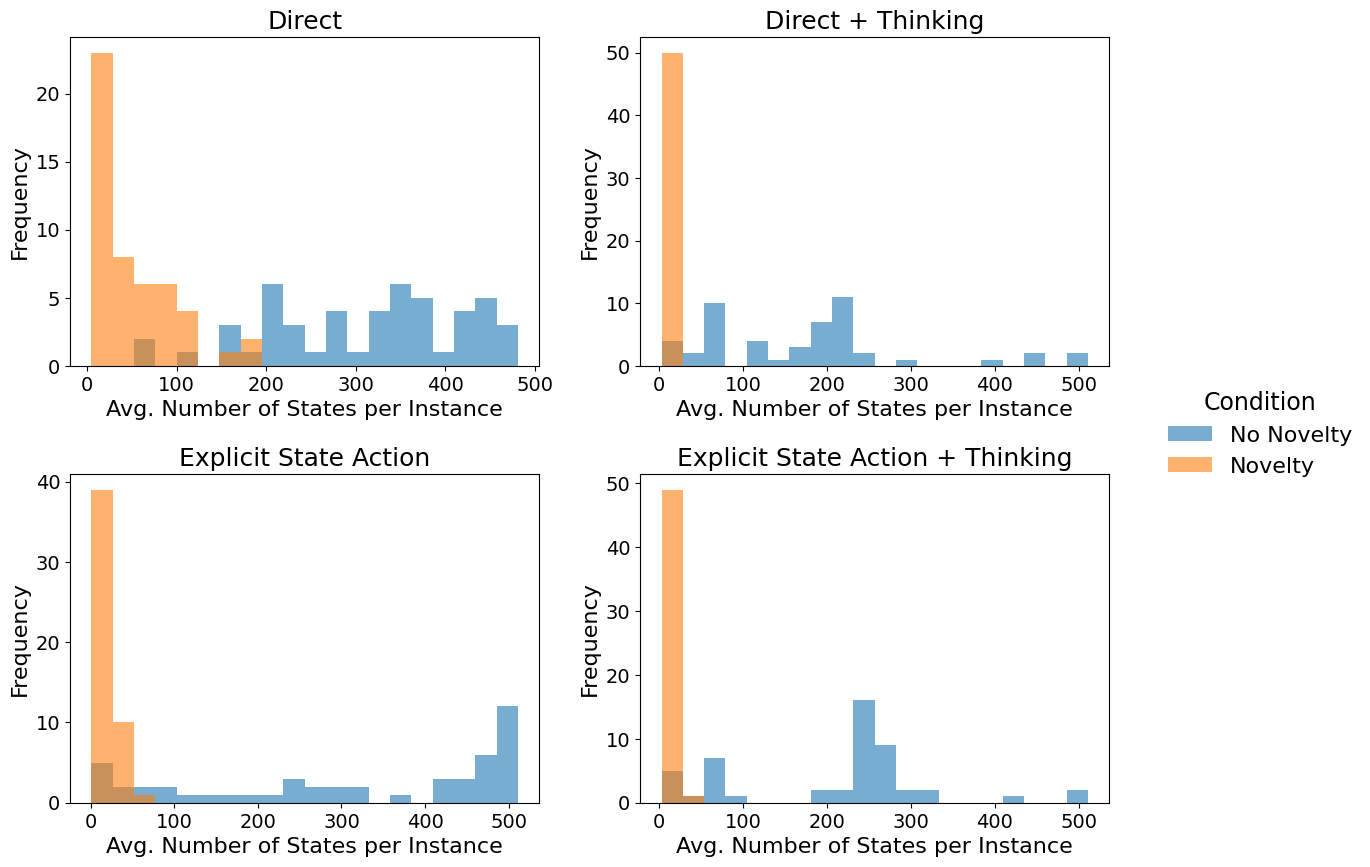

In [9]:
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('notebook')
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({
    #'font.size': 18,
    'axes.titlesize': 18,
    'axes.labelsize': 16,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 16,
    'legend.title_fontsize': 17,
    #'figure.titlesize': 20,
})

to_plot = sorted(set(c for c, _ in states_per_config.keys()))
# remove base_simple
to_plot.remove("base_simple")

# rename configs
config_rename_map = {
    "base_reasoning": "Direct",
    "base_thinking": "Direct + Thinking",
    "explicit_state_action_2_reasoning": "Explicit State Action",
    "explicit_state_action_2_thinking": "Explicit State Action + Thinking",
}

plt.figure(figsize=(12,9))

for i, config in enumerate(to_plot):
    plt.subplot(2, 2, i+1)
    
    values_non = states_per_config[(config, "non_novelty")]
    values_nov = states_per_config[(config, "novelty")]
    
    # Determine separate ranges for better visibility
    min_val = min(min(values_non), min(values_nov))
    max_val = max(max(values_non), max(values_nov))
    
    # Plot novelty and non-novelty histograms using seaborn
    sns.histplot(values_non, bins=20, alpha=0.6, label="No Novelty", binrange=(min_val, max_val), edgecolor='none', linewidth=0)
    sns.histplot(values_nov, bins=20, alpha=0.6, label="Novelty", binrange=(min_val, max_val), edgecolor='none', linewidth=0)

    plt.title(config_rename_map.get(config, config))
    plt.xlabel("Avg. Number of States per Instance")
    plt.ylabel("Frequency")
    # removed per-subplot legend to use a single shared legend on the figure

# adjust layout to leave room for a single legend on the right
plt.tight_layout(pad=1.9, rect=[0, 0, 0.96, 1])
# create a single legend based on the last axis' handles (histograms use consistent labels)
handles, labels = plt.gca().get_legend_handles_labels()
plt.gcf().legend(handles, labels, loc='center left', bbox_to_anchor=(0.97, 0.5), title="Condition", frameon=False)

# save figure
plt.savefig("states_histograms.svg")

plt.show()

In [4]:
import os

os.environ["FAST_DOWNWARD"] = "/home/leon/bachelor_arbeit/fast-downward-24.06/"

# get stats of problem instances:
problem_instance_dir = "test_data/PDDL/Blocksworld/instances/"
domain_file = "test_data/PDDL/Blocksworld/domain.pddl"
problem_instance_files = [f for f in os.listdir(problem_instance_dir) if f.endswith(".pddl")]
print(f"Total instance files: {len(problem_instance_files)}")

from plan_gen import compute_optimal_plan
optimal_plans = {}
plan_lengths = {}
for instance_file in problem_instance_files:
    instance_path = os.path.join(problem_instance_dir, instance_file)
    plan = compute_optimal_plan(domain_file, instance_path)
    plan_length = len(plan.split("\n")) if plan else "No plan found"
    optimal_plans[instance_file] = plan
    plan_lengths[instance_file] = plan_length
    #print(f"Instance: {instance_file}, Optimal plan length: {plan_length}")

average_plan_length = sum(plan_lengths.values()) / len(plan_lengths) if plan_lengths else 0
print(f"Average optimal plan length: {average_plan_length}")

Total instance files: 50
Average optimal plan length: 6.12


In [5]:
# average plan length for solved instances of each config
for config, date in current_configs.items():
    print(f"{config}: {date}")
    config_name = f"{config}/{tag}{date}.json"
    with open(os.path.join(results_dir, config_name), "r") as f:
        data = json.load(f)
        results = data["results"]
        plan_lengths_solved = []
        for result in results:
            instance = result["task_id"]
            success = result["success"]
            optimal_plan_length = plan_lengths[instance]
            if success and isinstance(optimal_plan_length, int):
                plan_lengths_solved.append(optimal_plan_length)
        if plan_lengths_solved:
            avg_plan_length = sum(plan_lengths_solved) / len(plan_lengths_solved)
            print(f"Config: {config}, Novelty: False, Average optimal plan length for solved instances: {avg_plan_length}")
        else:
            print(f"Config: {config}, Novelty: False, No optimal plan lengths found for solved instances")

for config, date in current_configs_novelty.items():
    print(f"{config}: {date}")
    config_name = f"{config}/{tag_with_novelty}{date}.json"
    with open(os.path.join(results_dir, config_name), "r") as f:
        data = json.load(f)
        results = data["results"]
        plan_lengths_solved = []
        for result in results:
            instance = result["task_id"]
            success = result["success"]
            optimal_plan_length = plan_lengths[instance]
            if success and isinstance(optimal_plan_length, int):
                plan_lengths_solved.append(optimal_plan_length)
        if plan_lengths_solved:
            avg_plan_length = sum(plan_lengths_solved) / len(plan_lengths_solved)
            print(f"Config: {config}, Novelty: True, Average optimal plan length for solved instances: {avg_plan_length}")
        else:
            print(f"Config: {config}, Novelty: True, No optimal plan lengths found for solved instances")

base_simple: 2025-09-16_16-46
Config: base_simple, Novelty: False, Average optimal plan length for solved instances: 6.428571428571429
explicit_state_action_2_thinking: 2025-09-16_18-04
Config: explicit_state_action_2_thinking, Novelty: False, Average optimal plan length for solved instances: 6.066666666666666
explicit_state_action_2_reasoning: 2025-09-17_13-03
Config: explicit_state_action_2_reasoning, Novelty: False, Average optimal plan length for solved instances: 6.428571428571429
base_thinking: 2025-09-16_17-40
Config: base_thinking, Novelty: False, Average optimal plan length for solved instances: 6.0638297872340425
base_reasoning: 2025-09-16_16-56
Config: base_reasoning, Novelty: False, Average optimal plan length for solved instances: 6.090909090909091
base_simple: 2025-09-16_18-06
Config: base_simple, Novelty: True, Average optimal plan length for solved instances: 6.6
explicit_state_action_2_thinking: 2025-09-16_18-52
Config: explicit_state_action_2_thinking, Novelty: True, 

In [9]:
tot = instances_per_config["explicit_state_action_2_reasoning"][0]

from tree_gui import get_tree_view
from PySide6.QtWidgets import QApplication
import qdarkstyle

tree = tot.init_state

# Create a tree view using the TreeOfThoughts class
app = QApplication.instance()
if not app:
    app = QApplication([])
app.setStyleSheet(qdarkstyle.load_stylesheet(qt_api='pyside6'))
tree_view = get_tree_view(tree, 80, 150)
tree_view.show()
app.exec()

0

In [2]:
from tot_tester import TestRunner
from pddl_translation.translator import NatLangTranslator
import yaml
from pddl_translation.pddl_translation import PDDLTranslationConfig
# Initialize the prompt translator
domain_config_dict = yaml.safe_load(open("pddl_translation/domains/logistics.yaml", "r", encoding="utf-8"))
domain_config = PDDLTranslationConfig.model_validate(domain_config_dict)
prompt_translator = NatLangTranslator(domain_config)
#os.environ["FAST_DOWNWARD"] = "C:\\Users\\Leon\\Documents\\UniPC\\bachelor_arbeit\\downward"
os.environ["FAST_DOWNWARD"] = "/home/leon/bachelor_arbeit/fast-downward-24.06/"
#os.environ["VAL"] = "C:\\Users\\Leon\\Documents\\UniPC\\bachelor_arbeit\\VAL"
os.environ["VAL"] = "/home/leon/bachelor_arbeit/VAL/validate"
context = "I have to plan logistics to transport packages within cities via trucks and between cities via airplanes. Locations within a city are directly connected (trucks can move between any two such locations), and so are the cities. In each city there is exactly one truck and each city has one location that serves as an airport.\nHere are the actions that can be performed:\n\nLoad a package into a truck. \nLoad a package into an airplane.\nUnload a package from a truck. \nUnload a package from an airplane. \nDrive a truck from one location to another location. \nFly an airplane from one city to another city.\n\nThe following are the restrictions on the actions:\nA package can be loaded into a truck only if the package and the truck are in the same location.\nOnce a package is loaded into a truck, the package is not at the location and is in the truck.   \nA package can be loaded into an airplane only if the package and the airplane are in the same location.\nOnce a package is loaded into an airplane, the package is not at the location and is in the airplane.\nA package can be unloaded from a truck only if the package is in the truck.\nOnce a package is unloaded from a truck, the package is not in the truck and is at the location of the truck.\nA package can be unloaded from an airplane only if the package in the airplane.\nOnce a package is unloaded from an airplane, the package is not in the airplane and is at the location of the airplane.   \nA truck can be driven from one location to another if the truck is at the from-location and both from-location and to-location are locations in the same city.\nOnce a truck is driven from one location to another, it is not at the from-location and is at the to-location.\nAn airplane can be flown from one city to another if the from-location and the to-location are airports and the airplane is at the from-location.\nOnce an airplane is flown from one city to another the airplane is not at the from-location and is at the to-location."
runner = TestRunner(engine, prompt_translator, context=context, logistics=True)

In [5]:
test_query = """I have to plan logistics to transport packages within cities via trucks and between cities via airplanes. Locations within a city are directly connected (trucks can move between any two such locations), and so are the cities. In each city there is exactly one truck and each city has one location that serves as an airport.\nHere are the actions that can be performed:\n\nLoad a package into a truck. \nLoad a package into an airplane.\nUnload a package from a truck. \nUnload a package from an airplane. \nDrive a truck from one location to another location. \nFly an airplane from one city to another city.\n\nThe following are the restrictions on the actions:\nA package can be loaded into a truck only if the package and the truck are in the same location.\nOnce a package is loaded into a truck, the package is not at the location and is in the truck.   \nA package can be loaded into an airplane only if the package and the airplane are in the same location.\nOnce a package is loaded into an airplane, the package is not at the location and is in the airplane.\nA package can be unloaded from a truck only if the package is in the truck.\nOnce a package is unloaded from a truck, the package is not in the truck and is at the location of the truck.\nA package can be unloaded from an airplane only if the package in the airplane.\nOnce a package is unloaded from an airplane, the package is not in the airplane and is at the location of the airplane.   \nA truck can be driven from one location to another if the truck is at the from-location and both from-location and to-location are locations in the same city.\nOnce a truck is driven from one location to another, it is not at the from-location and is at the to-location.\nAn airplane can be flown from one city to another if the from-location and the to-location are airports and the airplane is at the from-location.\nOnce an airplane is flown from one city to another the airplane is not at the from-location and is at the to-location.
You must always specify the location of every loading and unloading action.
Given the start state location_2_0 is in city_2, truck_0 is at location_0_1, truck_1 is at location_1_1, location_1_0 is in city_1, package_0 is at location_0_0, location_2_1 is in city_2, location_2_0 is an airport, location_0_1 is in city_0, airplane_0 is at location_1_0, location_0_0 is an airport, location_0_0 is in city_0, location_1_0 is an airport, location_1_1 is in city_1, truck_2 is at location_2_0 and the goal atoms package_0 is at location_2_0, generate a plan to reach the goal state. [PLAN]"""
answer = await engine.query(test_query, max_tokens=1000)
print(f"Test query answer: {answer}")

Test query answer: To solve this logistics planning problem, we need to move **package_0** from **location_0_0** (which is in **city_0**) to **location_2_0** (which is in **city_2**). We have **trucks** for local movement within a city and **airplanes** for movement between cities.

---

### **Initial State Summary:**

- **package_0** is at **location_0_0** (which is in **city_0** and is an airport).
- **truck_0** is at **location_0_1** (in **city_0**).
- **truck_1** is at **location_1_1** (in **city_1**).
- **truck_2** is at **location_2_0** (in **city_2**; this is the **goal location**).
- **airplane_0** is at **location_1_0** (which is in **city_1** and is an airport).
- **location_0_0** is an airport in **city_0**.
- **location_1_0** is an airport in **city_1**.
- **location_2_0** is an airport in **city_2**.

---

### **Goal:**
- **package_0** must be at **location_2_0**.

---

### **Step-by-Step Plan:**

We will use the following sequence of actions:

---

#### **Step 1: Load pac

In [7]:
config_name = "base_reasoning"
config=Configuration.from_file(config_name)
results = await runner.run_logistics(config)

Tree of Thoughts initialized with mode: base, max_depth: 5, branch_factor: 2, novelty: False, explicit_state_action: False


In [9]:
print(results)

([Result(task_id='instance-34.pddl', success=False, answer='No answer found.', token_usage=33871, num_times_pruned=0)], {'total_tasks': 1, 'successful_tasks': 0, 'failed_tasks': 1, 'total_token_usage': 33871, 'total_num_times_pruned': 0})
